In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime

In [2]:
MovieNums = pd.read_csv('Budget_clean.csv', index_col = [0])

# This week of the year will always contain the date generated except for 
# leap years that begin on Thursday, which will next occur in 2032 and last occurred in 2004.

week_dates = []
d = "2017-W1"
r = datetime.datetime.strptime(d + '-1', "%Y-W%W-%w")
for w in range(0,52):
    week_index = (r+datetime.timedelta(weeks=w) + datetime.timedelta(days=2))
    week_dates.append(week_index.strftime("%d-%b"))
week_dates.append("31-Dec")
week_dates


MovieNums['Week Date'] = MovieNums['Week'].apply(lambda x: week_dates[x-1])
MovieNums.head()

,Release Date,Movie,Budget,Domestic Gross,Worldwide Gross,Year,Week,Dom_Profits,WW_Profits,Week Date
0,2009-12-18,Avatar,425000000,760507625,2789705275,2009,51,335507625,2364705275,20-Dec
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,20,-169536125,635063875,17-May
2,2019-04-26,Avengers: Endgame,400000000,856706929,2793009730,2019,17,456706929,2393009730,26-Apr
3,2019-06-07,Dark Phoenix,350000000,65609445,246300941,2019,23,-284390555,-103699059,07-Jun
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,18,128405868,1072413963,03-May


In [3]:
#adding Return on Investment column to normalize data
MovieNums['%ROI'] = 100 * MovieNums['Dom_Profits'] / MovieNums['Budget'] 

In [4]:
#Make a sub df of Week and ROI
MovieNumsWKROI = MovieNums[['Week', '%ROI']]
#Grouped by Week and Calculated the ROI
MovieNumsROI_Med = MovieNumsWKROI.groupby('Week').median()
#Sorted the df by Median ROIs
MovieNumsROI_Med.sort_values('%ROI', inplace = True)
#saved the sorted weeks as a list to feed into plot order
WeeksByROI = MovieNumsROI_Med.index.tolist()
#optional to limit limit list to top 25 ROI medians
# TrunkWeeksByROI = WeeksByROI[-10::]
# TrunkWeeks = sorted(TrunkWeeksByROI)


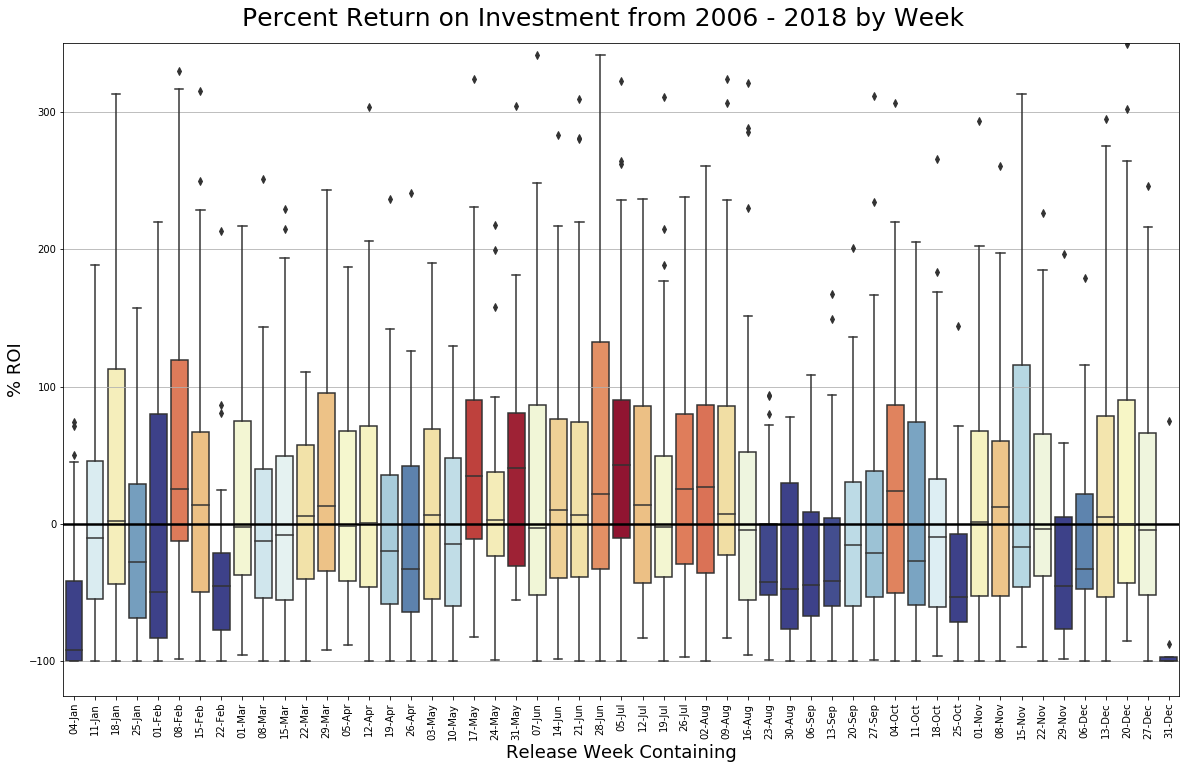

In [46]:
#set median valuses of %ROI
median_vals = MovieNums.groupby('Week')['%ROI'].median()
#set normalize of distance from median to the break even line
norm = plt.Normalize(0-median_vals.max(), median_vals.max()-0)
#coerce those values into a list to be usedb my palettes in bocplot argument
median_vals = median_vals.tolist()
#set a colormap to correspond to values set in norm
colors = plt.cm.RdYlBu_r(norm(median_vals))

#set figure size
plt.figure(figsize=(20,12))
#set size of axis labels 
plt.rcParams["axes.labelsize"] = 18
##set window range
plt.ylim(-125, 350)
#set grid to show
plt.grid(b=True, which='major', axis='both')
#make the plot
ax = sns.boxplot(x="Week Date", y="%ROI", data=MovieNums, order = week_dates, palette=colors, showfliers=True).set(xlabel='Release Week Containing', ylabel='% ROI')
#plot horiztonal line at break even point %ROI = 0
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
#set figure title
plt.figtext(.5,.9,'Percent Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
#rotate xticks
plt.xticks(rotation=90)
#save plot 
plt.savefig('ROI_by_Week2.jpg')
plt.show()




In [41]:
profit_weeks = week_dates[21:27]

In [42]:
profit_weeks

['31-May', '07-Jun', '14-Jun', '21-Jun', '28-Jun', '05-Jul']

In [43]:
ProfitMovie = MovieNums[MovieNums['Week Date'].isin(profit_weeks)]

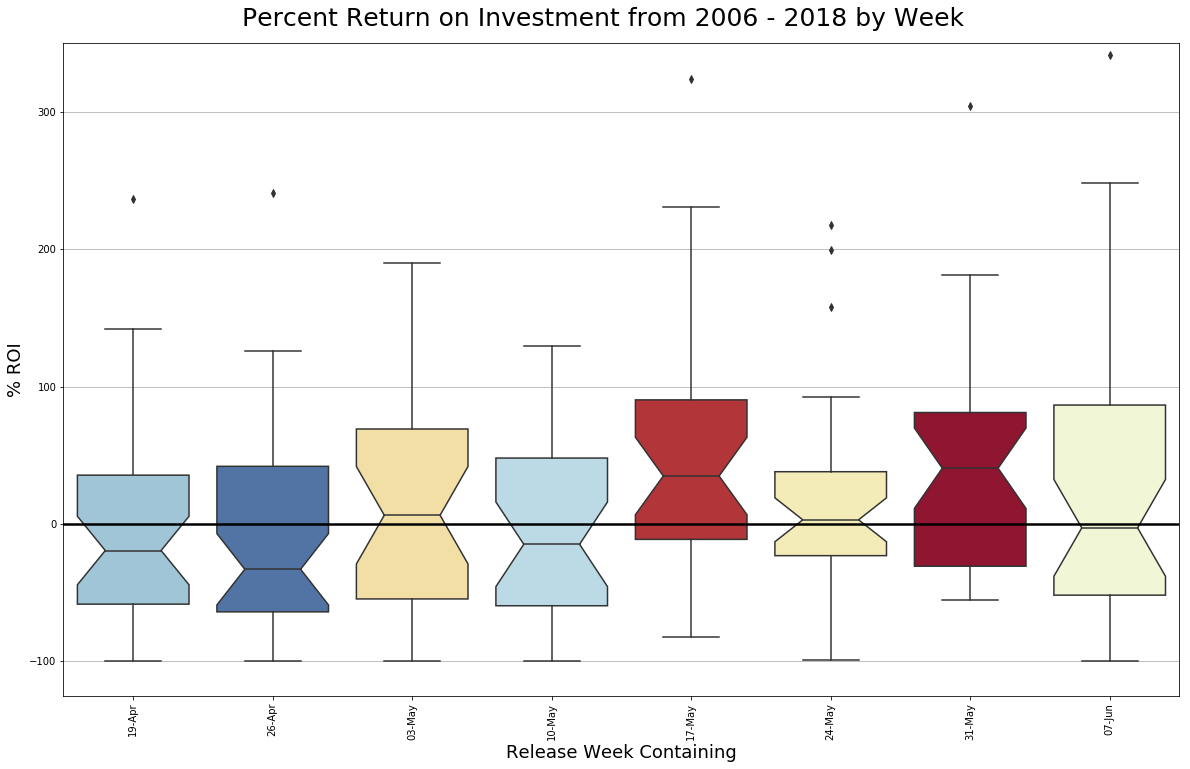

In [25]:
#set median valuses of %ROI
median_vals = ProfitMovie.groupby('Week')['%ROI'].median()
#set normalize of distance from median to the break even line
norm = plt.Normalize(0-median_vals.max(), median_vals.max()-0)
#coerce those values into a list to be usedb my palettes in bocplot argument
median_vals = median_vals.tolist()
#set a colormap to correspond to values set in norm
colors = plt.cm.RdYlBu_r(norm(median_vals))

#set figure size
plt.figure(figsize=(20,12))
#set size of axis labels 
plt.rcParams["axes.labelsize"] = 18
##set window range
plt.ylim(-125, 350)
#set grid to show
plt.grid(b=True, which='major', axis='both')
#make the plot
ax = sns.boxplot(x="Week Date", y="%ROI", data=ProfitMovie, order = profit_weeks, palette=colors, showfliers=True, notch=True).set(xlabel='Release Week Containing', ylabel='% ROI')
#plot horiztonal line at break even point %ROI = 0
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
#set figure title
plt.figtext(.5,.9,'Percent Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
#rotate xticks
plt.xticks(rotation=90)
#save plot 
# plt.savefig('Blog2.2.jpg')
plt.show()

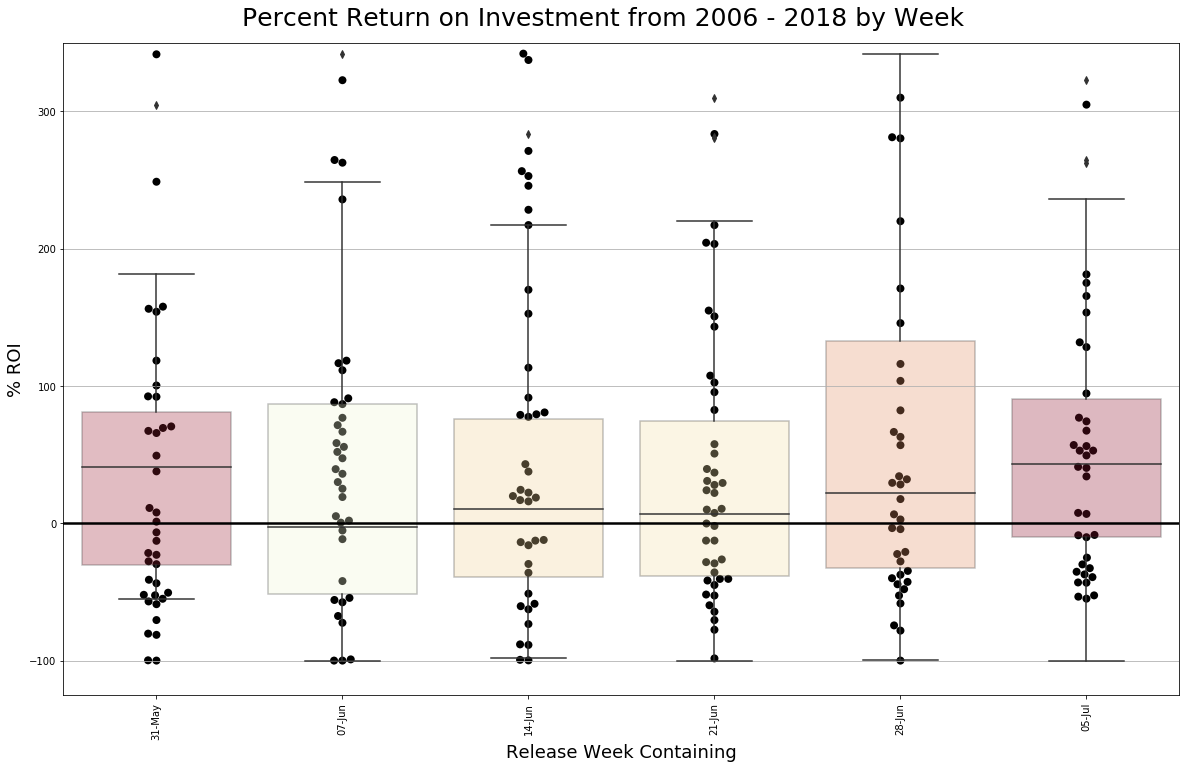

In [45]:


#set median valuses of %ROI
median_vals = ProfitMovie.groupby('Week')['%ROI'].median()
#set normalize of distance from median to the break even line
norm = plt.Normalize(0-median_vals.max(), median_vals.max()-0)
#coerce those values into a list to be usedb my palettes in bocplot argument
median_vals = median_vals.tolist()
#set a colormap to correspond to values set in norm
colors = plt.cm.RdYlBu_r(norm(median_vals))

#set figure size
plt.figure(figsize=(20,12))
#set size of axis labels 
plt.rcParams["axes.labelsize"] = 18
##set window range
plt.ylim(-125, 350)
#set grid to show
plt.grid(b=True, which='major', axis='both')
#make the plot
ax = sns.swarmplot(x="Week Date", y="%ROI", data=ProfitMovie, zorder=0, color = 'black', size = 8)
ax = sns.boxplot(x="Week Date", y="%ROI", data=ProfitMovie, order = profit_weeks, palette=colors, showfliers=True, boxprops=dict(alpha=.3)).set(xlabel='Release Week Containing', ylabel='% ROI')

#plot horiztonal line at break even point %ROI = 0
plt.axhline(y=0, color = "black", label = "Break Even", lw = 2.5)
#set figure title
plt.figtext(.5,.9,'Percent Return on Investment from 2006 - 2018 by Week', fontsize=25, ha='center')
#rotate xticks
plt.xticks(rotation=90)
#save plot 
plt.savefig('Blog2.3.jpg')
plt.show()